In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
os.chdir('G:/AI_INTRO/DEEPLIZARD/Sign-Language-Digits-Dataset/Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [4]:
train_path = 'G:/AI_INTRO/DEEPLIZARD/Sign-Language-Digits-Dataset/Dataset/train'
valid_path = 'G:/AI_INTRO/DEEPLIZARD/Sign-Language-Digits-Dataset/Dataset/valid'
test_path = 'G:/AI_INTRO/DEEPLIZARD/Sign-Language-Digits-Dataset/Dataset/test'

In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                directory=train_path, target_size=(224,224), batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                directory=valid_path, target_size=(224,224), batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                directory=test_path, target_size=(224,224), batch_size = 10, shuffle = False)mobile

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [18]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [19]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [20]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [21]:
model = Model(inputs=mobile.input, outputs = predictions)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [23]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [24]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit_generator(train_batches, steps_per_epoch=18,
                   validation_data=valid_batches, validation_steps=3, epochs=60, verbose=2)

C:\Users\h\anaconda3\envs\tf-new\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
18/18 - 8s - loss: 1.8581 - accuracy: 0.3500 - val_loss: 2.6625 - val_accuracy: 0.2000
Epoch 2/60
18/18 - 2s - loss: 0.8936 - accuracy: 0.7442 - val_loss: 2.3450 - val_accuracy: 0.5000
Epoch 3/60
18/18 - 2s - loss: 0.6303 - accuracy: 0.8444 - val_loss: 1.7814 - val_accuracy: 0.5000
Epoch 4/60
18/18 - 2s - loss: 0.3830 - accuracy: 0.9056 - val_loss: 1.7470 - val_accuracy: 0.4667
Epoch 5/60
18/18 - 1s - loss: 0.3482 - accuracy: 0.9167 - val_loss: 1.3232 - val_accuracy: 0.6333
Epoch 6/60
18/18 - 1s - loss: 0.2740 - accuracy: 0.9389 - val_loss: 0.6942 - val_accuracy: 0.8333
Epoch 7/60
18/18 - 1s - loss: 0.2755 - accuracy: 0.9477 - val_loss: 0.3905 - val_accuracy: 0.9000
Epoch 8/60
18/18 - 1s - loss: 0.2276 - accuracy: 0.9500 - val_loss: 0.3122 - val_accuracy: 0.9333
Epoch 9/60
18/18 - 1s - loss: 0.2065 - accuracy: 0.9722 - val_loss: 0.4738 - val_accuracy: 0.8333
Epoch 10/60
18/18 - 1s - loss: 0.1953 - accuracy: 0.9500 - val_loss: 0.4489 - val_accuracy: 0.8000
Epoch 11/60
18/18 -

In [26]:
test_labels = test_batches.classes

In [27]:
predictions = model.predict_generator(test_batches, steps = 5, verbose=0)

C:\Users\h\anaconda3\envs\tf-new\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [28]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [29]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


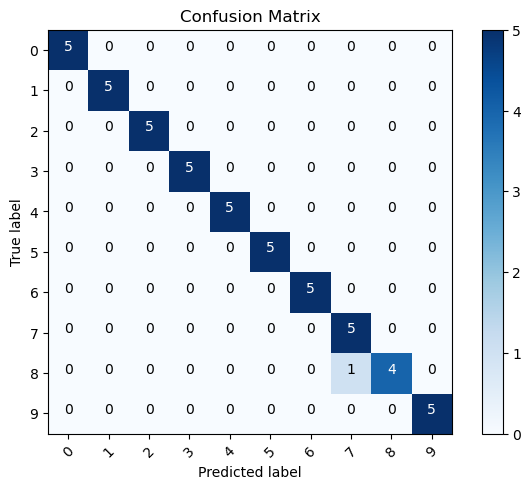

In [32]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")